In [1]:
import os
import rootpath
import sys
sys.path.append(rootpath.detect())

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from figure_utilities import RESULT_FILES_LIST_2OBJ, load_result, format_figures, Symbols, Styles, save_fig
from testsuite.utilities import Pareto_split
from testsuite.analysis_tools import get_igd_refpoint_dict, strip_problem_names

In [4]:
def plot_results_stage(rc, stage=100, repeat=25):
    
    D_rp = get_igd_refpoint_dict()
    P = D_rp[f'wfg{rc.n_prob}_{rc.n_obj}obj_{rc.n_dim}dim']
    
    fig = plt.figure(figsize=[(4/5)*3, 4])
    fig_ax = fig.gca()
    
    fig_ax.axis("scaled")
    fig_ax.set_xlabel(Symbols.function_n(1))
    fig_ax.set_ylabel(Symbols.function_n(2))
    
    
    # plot Pareto front
    fig_ax.plot(*P[np.argsort(P[:, 0])].T, label=Symbols.Pareto_front, **Styles.line_Pareto_front, zorder=1)
    
    # plot lhs samples
    fig_ax.scatter(*np.asarray(Pareto_split(rc[repeat].y[:10])[0]).T, label = Symbols.lhs_samples, **Styles.points_lhs, zorder=2) 
    
    # plot directed solutions
    fig_ax.scatter(*np.asarray(Pareto_split(rc[repeat].y[10:stage])[0]).T, label = Symbols.approx_Pareto_front, **Styles.points_pareto_approx, zorder=4) 
    
    # fig_ax.scatter(*np.asarray(Pareto_split(rc[0].y[10:stage])[1]).T, **Styles.approx_Pareto_front, alpha = 0.2) 
    
    # plot undirected solutions
    fig_ax.scatter(*np.asarray(Pareto_split(rc.reference[repeat].y[10:stage])[0]).T, label = Symbols.approx_Pareto_front_ref, **Styles.points_pareto_approx_ref, zorder=3) 
#     # fig_ax.scatter(*np.asarray(Pareto_split(rc.reference[0].y[10:stage])[1]).T, **Styles.approx_Pareto_front_ref, alpha = 0.2) 
    
    # plot target
    fig_ax.scatter(*np.asarray(rc.targets[0]).T, label=Symbols.target, **Styles.points_target, zorder=5)
    fig_ax.legend()
    fig_ax.set_xlim(0, 3)
    fig_ax.set_ylim(0, 5) 
    return fig
    

In [5]:
format_figures()

In [6]:
med_result_name = 'wfg6_2obj_6dim_1.json'
med_result = load_result(med_result_name)

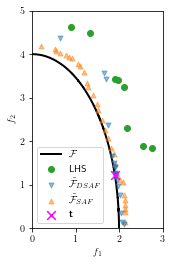

In [7]:
fig_00 = plot_results_stage(med_result, 150)
# save_fig(fig_00, filename="fig_median_2obj_solution_comparisson_t1")

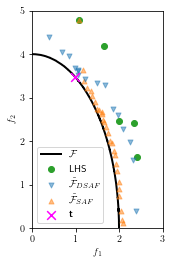

In [8]:
med_result_name = 'wfg6_2obj_6dim_4.json'
med_result = load_result(med_result_name)

fig_01 = plot_results_stage(med_result, 150)
# save_fig(fig_01, filename="fig_median_2obj_solution_comparisson_t2")

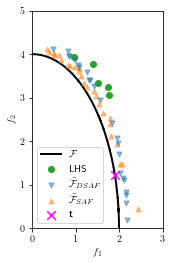

In [9]:
poor_result_name = 'wfg4_2obj_6dim_1.json'
poor_result = load_result(poor_result_name)
fig_10 = plot_results_stage(poor_result, stage=150, repeat=5)
# save_fig(fig_10, filename="fig_mian_2obj_solution_comparisson_wfg4_t1")

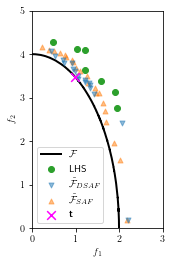

In [10]:
poor_result_name = 'wfg4_2obj_6dim_4.json'
poor_result = load_result(poor_result_name)
fig_11 = plot_results_stage(poor_result, stage=150, repeat=3)
# save_fig(fig_11, filename="fig_mian_2obj_solution_comparisson_wfg4_t2")

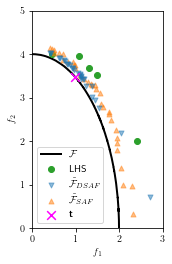

In [11]:
fig_10 = plot_results_stage(poor_result, 150)
# save_fig(fig_10, filename="fig_mian_2obj_solution_comparisson_wfg4_t1")